In [10]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt

In [2]:
train_files = [
    "One-Hot/Train_Orig_OH.csv",
    "One-Hot/Scaled/Train_Scaled_All_OH.csv",
    "One-Hot/Scaled/Train_Scaled_Cont_OH.csv",
    "One-Hot/MinMax/Train_MM_OH.csv",
    "One-Hot/MinMax/train_OH_MM_PCA15.csv",
    "One-Hot/MinMax/train_OH_MM_PCA20.csv",
    "One-Hot/MinMax/train_OH_MM_PCA25.csv",
    "One-Hot/MinMax/train_OH_MM_PCA30.csv",
    "One-Hot/MinMax/train_OH_MM_PCA35.csv",
    "IntClasses/Train_Orig_Int.csv",
    "IntClasses/Scaled/Train_Scaled_All_Int.csv",
    "IntClasses/Scaled/Train_Scaled_Cont_Int.csv",
    "IntClasses/MinMax/Train_MM_Int.csv",
    "IntClasses/MinMax/train_Int_MM_PCA10.csv",
    "IntClasses/MinMax/train_Int_MM_PCA15.csv",
    "IntClasses/MinMax/train_Int_MM_PCA20.csv",
    "IntClasses/MinMax/train_Int_MM_PCA25.csv",
]

results = []

In [3]:
def evaluate_model(name, model, X, y, dataset_type):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    rmse_pct = (rmse / y.mean()) * 100

    print(f"\n{name} - {dataset_type} Regression Evaluation")
    print("MAE :", mae)
    print("MSE :", mse)
    print("RMSE:", rmse)
    print("RMSE % Err :", rmse_pct)
    print("R2  :", r2)

    return mae, mse, rmse, rmse_pct, r2

In [4]:
for path in train_files:
    print("\n================================================================================")
    print(f"Processing dataset: {path}")

    train_df = pd.read_csv(path)
    valid_path = path.replace("Train", "Valid").replace("train", "valid")
    test_path = path.replace("Train", "Test").replace("train", "test")

    valid_df = pd.read_csv(valid_path)
    test_df = pd.read_csv(test_path)

    X_train = train_df.iloc[:, :-2]
    y_train = train_df.iloc[:, -1]

    X_valid = valid_df.iloc[:, :-2]
    y_valid = valid_df.iloc[:, -1]

    X_test = test_df.iloc[:, :-2]
    y_test = test_df.iloc[:, -1]

    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train)

    name = os.path.basename(path)
    evaluate_model(name, model, X_valid, y_valid, "Validation")
    mae, mse, rmse, rmse_pct, r2 = evaluate_model(name, model, X_test, y_test, "Test")

    results.append({
        "Dataset": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "RMSE %": rmse_pct,
        "R2": r2
    })

results_df = pd.DataFrame(results)


Processing dataset: One-Hot/Train_Orig_OH.csv

Train_Orig_OH.csv - Validation Regression Evaluation
MAE : 1.642608618068695
MSE : 6.434610143125154
RMSE: 2.5366533352283582
RMSE % Err : 4.9872418380573595
R2  : 0.8959746599956826

Train_Orig_OH.csv - Test Regression Evaluation
MAE : 1.6803112307548522
MSE : 6.796185154404972
RMSE: 2.6069493962110144
RMSE % Err : 5.144900531395483
R2  : 0.8863406092016319

Processing dataset: One-Hot/Scaled/Train_Scaled_All_OH.csv

Train_Scaled_All_OH.csv - Validation Regression Evaluation
MAE : 0.2115768810528355
MSE : 0.10675554462565963
RMSE: 0.326734670069859
RMSE % Err : 2641.8883930107845
R2  : 0.895974673381457

Train_Scaled_All_OH.csv - Test Regression Evaluation
MAE : 0.21643321809743019
MSE : 0.11275441594517924
RMSE: 0.3357892433434687
RMSE % Err : -2707.5814755424785
R2  : 0.8863405829415673

Processing dataset: One-Hot/Scaled/Train_Scaled_Cont_OH.csv

Train_Scaled_Cont_OH.csv - Validation Regression Evaluation
MAE : 0.2115768810528355
MSE 


train_Int_MM_PCA25.csv - Validation Regression Evaluation
MAE : 0.04392530096250593
MSE : 0.0033745112477179965
RMSE: 0.05809054353092245
RMSE % Err : 14.533924687458416
R2  : 0.833771326121179

train_Int_MM_PCA25.csv - Test Regression Evaluation
MAE : 0.0435858074787606
MSE : 0.0034072735894580815
RMSE: 0.058371856141963496
RMSE % Err : 14.732718011373217
R2  : 0.8263697925495777


In [5]:
best_r2 = results_df.loc[results_df['R2'].idxmax()]
best_rmse_pct = results_df.loc[results_df['RMSE %'].idxmin()]
best_rmse = results_df.loc[results_df['RMSE'].idxmin()]
best_mae = results_df.loc[results_df['MAE'].idxmin()]
best_mse = results_df.loc[results_df['MSE'].idxmin()]

print("BEST REGRESSION PERFORMING DATASETS")
print("Lowest MAE  :", best_mae['Dataset'], f"({best_mae['MAE']:.4f})")
print("Lowest MSE  :", best_mse['Dataset'], f"({best_mse['MSE']:.4f})")
print("Lowest RMSE :", best_rmse['Dataset'], f"({best_rmse['RMSE']:.4f})")
print("Lowest RMSE % :", best_rmse_pct['Dataset'], f"({best_rmse['RMSE %']:.4f})")
print("Highest R²  :", best_r2['Dataset'], f"({best_r2['R2']:.4f})")

BEST REGRESSION PERFORMING DATASETS
Lowest MAE  : Train_MM_OH.csv (0.0303)
Lowest MSE  : Train_MM_OH.csv (0.0022)
Lowest RMSE : Train_MM_OH.csv (0.0472)
Lowest RMSE % : Train_Scaled_All_Int.csv (11.9065)
Highest R²  : Train_MM_OH.csv (0.8866)


In [6]:
results_df

,Dataset,MAE,MSE,RMSE,RMSE %,R2
0,Train_Orig_OH.csv,1.680311,6.796185,2.606949,5.144901,0.886341
1,Train_Scaled_All_OH.csv,0.216433,0.112754,0.335789,-2707.581476,0.886341
2,Train_Scaled_Cont_OH.csv,0.216433,0.112754,0.335789,-2707.581476,0.886341
3,Train_MM_OH.csv,0.030336,0.002225,0.047174,11.906534,0.886596
4,train_OH_MM_PCA15.csv,0.089069,0.013056,0.114262,28.839008,0.334696
5,train_OH_MM_PCA20.csv,0.091241,0.013501,0.116193,29.326352,0.312020
6,train_OH_MM_PCA25.csv,0.072538,0.008633,0.092917,23.451595,0.560049
7,train_OH_MM_PCA30.csv,0.060354,0.006413,0.080082,20.212221,0.673196
8,train_OH_MM_PCA35.csv,0.045844,0.003673,0.060609,15.297429,0.812804
9,Train_Orig_Int.csv,1.711392,7.074557,2.659804,5.249211,0.881685


In [8]:
path = "./One-Hot/MinMax/Train_MM_OH.csv"
train_df = pd.read_csv(path)
valid_path = path.replace("Train", "Valid").replace("train", "valid")
test_path = path.replace("Train", "Test").replace("train", "test")

valid_df = pd.read_csv(valid_path)
test_df = pd.read_csv(test_path)

X_train = train_df.iloc[:, :-2]
y_train = train_df.iloc[:, -1]

X_valid = valid_df.iloc[:, :-2]
y_valid = valid_df.iloc[:, -1]

X_test = test_df.iloc[:, :-2]
y_test = test_df.iloc[:, -1]

model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

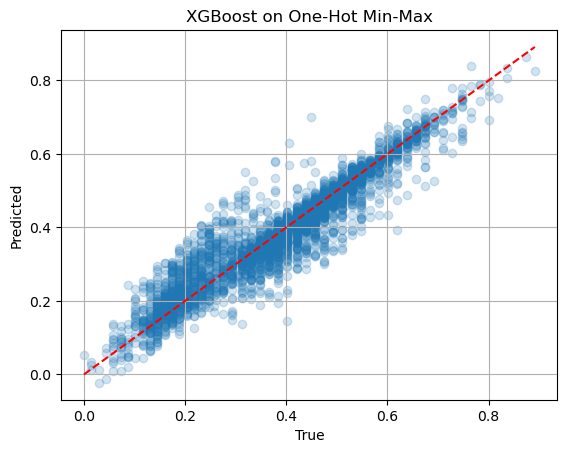

In [32]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.title("XGBoost on One-Hot Min-Max")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.grid()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.show()

In [40]:
results_df = pd.DataFrame()
results = []

for path in train_files:
    print("\n================================================================================")
    print(f"Processing dataset: {path}")

    train_df = pd.read_csv(path)
    valid_path = path.replace("Train", "Valid").replace("train", "valid")
    test_path = path.replace("Train", "Test").replace("train", "test")

    valid_df = pd.read_csv(valid_path)
    test_df = pd.read_csv(test_path)

    X_train = train_df.iloc[:, :-2]
    y_train = train_df.iloc[:, -1]

    X_valid = valid_df.iloc[:, :-2]
    y_valid = valid_df.iloc[:, -1]

    X_test = test_df.iloc[:, :-2]
    y_test = test_df.iloc[:, -1]

    model = XGBRegressor(objective='reg:squarederror', 
                             random_state=42, 
                             max_depth=6,
                             min_child_weight=10)
    model.fit(X_train, y_train)

    name = os.path.basename(path)
    evaluate_model(name, model, X_valid, y_valid, "Validation")
    mae, mse, rmse, rmse_pct, r2 = evaluate_model(name, model, X_test, y_test, "Test")

    results.append({
        "Dataset": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "RMSE %": rmse_pct,
        "R2": r2
    })

results_df = pd.DataFrame(results)

best_r2 = results_df.loc[results_df['R2'].idxmax()]
best_rmse_pct = results_df.loc[results_df['RMSE %'].idxmin()]
best_rmse = results_df.loc[results_df['RMSE'].idxmin()]
best_mae = results_df.loc[results_df['MAE'].idxmin()]
best_mse = results_df.loc[results_df['MSE'].idxmin()]

print("BEST REGRESSION PERFORMING DATASETS")
print("Lowest MAE  :", best_mae['Dataset'], f"({best_mae['MAE']:.4f})")
print("Lowest MSE  :", best_mse['Dataset'], f"({best_mse['MSE']:.4f})")
print("Lowest RMSE :", best_rmse['Dataset'], f"({best_rmse['RMSE']:.4f})")
print("Lowest RMSE % :", best_rmse_pct['Dataset'], f"({best_rmse['RMSE %']:.4f})")
print("Highest R²  :", best_r2['Dataset'], f"({best_r2['R2']:.4f})")

results_df


Processing dataset: One-Hot/Train_Orig_OH.csv

Train_Orig_OH.csv - Validation Regression Evaluation
MAE : 1.6413529479026792
MSE : 6.408744925632354
RMSE: 2.5315499058150825
RMSE % Err : 4.977208130914964
R2  : 0.8963928108990203

Train_Orig_OH.csv - Test Regression Evaluation
MAE : 1.6741047271728515
MSE : 6.6870386235251225
RMSE: 2.5859309007638087
RMSE % Err : 5.103419838079137
R2  : 0.888165975627901

Processing dataset: One-Hot/Scaled/Train_Scaled_All_OH.csv

Train_Scaled_All_OH.csv - Validation Regression Evaluation
MAE : 0.21141515292516558
MSE : 0.10632644237600795
RMSE: 0.3260773564294337
RMSE % Err : 2636.573532249801
R2  : 0.896392801562333

Train_Scaled_All_OH.csv - Test Regression Evaluation
MAE : 0.21563378370824685
MSE : 0.11094354713577263
RMSE: 0.33308189253661424
RMSE % Err : -2685.7511964678865
R2  : 0.8881659863328324

Processing dataset: One-Hot/Scaled/Train_Scaled_Cont_OH.csv

Train_Scaled_Cont_OH.csv - Validation Regression Evaluation
MAE : 0.21141515292516558
M


train_Int_MM_PCA25.csv - Validation Regression Evaluation
MAE : 0.04471674086668393
MSE : 0.003503984138171965
RMSE: 0.05919446036726718
RMSE % Err : 14.810118422022303
R2  : 0.8273934819524937

train_Int_MM_PCA25.csv - Test Regression Evaluation
MAE : 0.04385652397139643
MSE : 0.003375701474691003
RMSE: 0.05810078721231755
RMSE % Err : 14.664301785368583
R2  : 0.8279786662407356
BEST REGRESSION PERFORMING DATASETS
Lowest MAE  : Train_MM_OH.csv (0.0301)
Lowest MSE  : Train_MM_OH.csv (0.0022)
Lowest RMSE : Train_MM_OH.csv (0.0466)
Lowest RMSE % : Train_Scaled_All_OH.csv (11.7690)
Highest R²  : Train_MM_OH.csv (0.8892)


,Dataset,MAE,MSE,RMSE,RMSE %,R2
0,Train_Orig_OH.csv,1.674105,6.687039,2.585931,5.103420,0.888166
1,Train_Scaled_All_OH.csv,0.215634,0.110944,0.333082,-2685.751196,0.888166
2,Train_Scaled_Cont_OH.csv,0.215634,0.110944,0.333082,-2685.751196,0.888166
3,Train_MM_OH.csv,0.030069,0.002174,0.046629,11.768951,0.889201
4,train_OH_MM_PCA15.csv,0.089544,0.013172,0.114768,28.966898,0.328782
5,train_OH_MM_PCA20.csv,0.091288,0.013512,0.116243,29.339034,0.311425
6,train_OH_MM_PCA25.csv,0.072304,0.008532,0.092371,23.313919,0.565199
7,train_OH_MM_PCA30.csv,0.060062,0.006307,0.079417,20.044358,0.678602
8,train_OH_MM_PCA35.csv,0.045517,0.003660,0.060498,15.269222,0.813494
9,Train_Orig_Int.csv,1.689877,6.663982,2.581469,5.094614,0.888552


In [43]:
path = "./One-Hot/MinMax/Train_MM_OH.csv"
train_df = pd.read_csv(path)
valid_path = path.replace("Train", "Valid").replace("train", "valid")
test_path = path.replace("Train", "Test").replace("train", "test")

valid_df = pd.read_csv(valid_path)
test_df = pd.read_csv(test_path)

X_train = train_df.iloc[:, :-2]
y_train = train_df.iloc[:, -1]

X_valid = valid_df.iloc[:, :-2]
y_valid = valid_df.iloc[:, -1]

X_test = test_df.iloc[:, :-2]
y_test = test_df.iloc[:, -1]

model = XGBRegressor(objective='reg:squarederror', 
                             random_state=42, 
                             max_depth=6,
                             min_child_weight=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

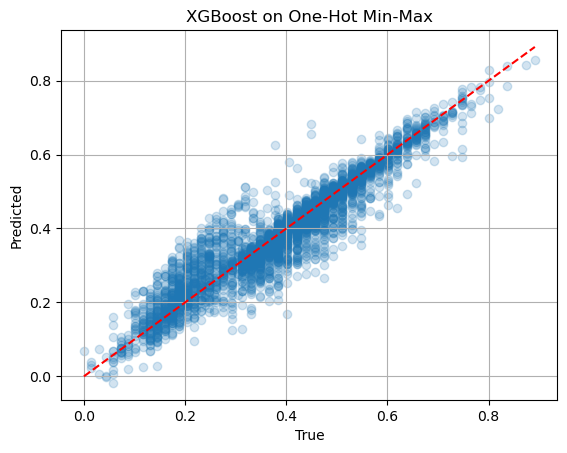

In [44]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.title("XGBoost on One-Hot Min-Max")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.grid()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.show()